In [2]:
#Import libraries

import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer , LancasterStemmer , SnowballStemmer , WordNetLemmatizer
import nltk
nltk.download('wordnet')
from wordcloud import WordCloud
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,FunctionTransformer
import pickle
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score,classification_report


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
d1=pd.read_csv(r"C:\Users\LENOVO\Downloads\meghanaamazon_review_data.csv")
d2=pd.read_csv(r"C:\Users\LENOVO\Downloads\renuka_amazon_review_data.csv")
d3=pd.read_csv(r"C:\Users\LENOVO\Downloads\Reviews.csv")
d4=pd.read_csv(r"C:\Users\LENOVO\Downloads\Pavani_concat_data.csv")

In [1]:
#Data Exploration

In [5]:
#Deleting Unwanted columns from datasets
d2.drop("Unnamed: 0",axis=1,inplace=True)
d4.drop("Unnamed: 0",axis=1,inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
#Data Cleaning

In [6]:
d4.rename(columns={"Ratings":"Rating","Reviews":"Review"},inplace=True)

In [7]:
#Concating the all the datasets
final_data = pd.concat([d1,d2,d3,d4],axis=0, ignore_index=True)

In [32]:
data=final_data.copy()

In [33]:
data

,Rating,Review
0,5.0,wonderful
1,4.0,good quality but little bit costly
2,5.0,regal
3,5.0,good quality
4,5.0,go for it without a second thought worth it!
...,...,...
4040,5.0,best phone with overall performance.camera qua...
4041,5.0,camera quality best processor low quality ka ...
4042,4.0,if you want for camera go for any other phone
4043,5.0,nice


In [34]:
#EDA

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  3772 non-null   float64
 1   Review  3849 non-null   object 
dtypes: float64(1), object(1)
memory usage: 63.3+ KB


Dataset consists of 4045 entries and 2 columns namely "Rating" and "Review"

In [36]:
data.isnull().sum()

Rating    273
Review    196
dtype: int64

In [37]:
(data["Rating"].isnull().sum()/len(data))*100

6.749072929542645

In [38]:
(data["Review"].isnull().sum()/len(data))*100

4.84548825710754

In [39]:
data.dropna(inplace=True)

Data consists of null values and the presence of null values is approximatly 6 percent and are at random ,so dropped null values.

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 0 to 4044
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  3749 non-null   float64
 1   Review  3749 non-null   object 
dtypes: float64(1), object(1)
memory usage: 87.9+ KB


On dropping null values the dataset shape changed from (4045,2) to (3749,2) 

In [41]:
data["Rating"]=data["Rating"].astype(int)

In [42]:
data["Rating"].value_counts()

4    1572
5    1462
3     469
1     205
2      41
Name: Rating, dtype: int64

In [ ]:
#Adding column to find the language of the review

In [4]:
from langdetect import detect_langs

In [43]:
from langdetect import detect
lang=[]
lang = []
for review in data['Review']:
    try:
        lang.append(detect(review))
        
    except:
        lang.append('Unknown')  # If language detection fails, mark it as 'Unknown'

data['Language'] = lang

print(data)

      Rating                                             Review Language
0          5                                          wonderful       af
1          4                 good quality but little bit costly       en
2          5                                              regal       ca
3          5                                       good quality       en
4          5      go for it without a second thought  worth it!       en
...      ...                                                ...      ...
4040       5  best phone with overall performance.camera qua...       en
4041       5  camera quality best  processor low quality ka ...       en
4042       4      if you want for camera go for any other phone       en
4043       5                                               nice       pl
4044       3  the phone is good but battery is not satisfied...       en

[3749 rows x 3 columns]


In [44]:
data1=data.copy()

In [46]:
data1["Language"].value_counts()

en         2963
so          135
af           74
ca           65
ro           62
fr           50
es           36
da           35
pl           31
it           30
no           30
hi           23
tl           18
sl           17
cy           16
id           16
de           14
sw           13
pt           12
hr           11
sq           10
et           10
cs           10
hu           10
sk            9
sv            8
lt            8
vi            8
fi            6
nl            6
lv            4
Unknown       4
tr            2
mr            1
te            1
ml            1
Name: Language, dtype: int64

In [52]:
data1.describe

<bound method NDFrame.describe of       Rating                                             Review Language
0          5                                          wonderful       af
1          4                 good quality but little bit costly       en
2          5                                              regal       ca
3          5                                       good quality       en
4          5      go for it without a second thought  worth it!       en
...      ...                                                ...      ...
4040       5  best phone with overall performance.camera qua...       en
4041       5  camera quality best  processor low quality ka ...       en
4042       4      if you want for camera go for any other phone       en
4043       5                                               nice       pl
4044       3  the phone is good but battery is not satisfied...       en

[3749 rows x 3 columns]>

In [59]:
data2=data1.groupby("Language")

Since reviews are collected from Rapid API there exists different languages which can decline the performance of the model

In [2]:
#pip install googletrans==4.0.0-rc1


In [68]:

from googletrans import Translator

In [70]:
# Initialize the translator
translator = Translator()

# Function to translate text to English
def translate_to_english(text):
    try:
        translation = translator.translate(text, dest='en')
        return translation.text if translation else None
    except Exception as e:
        print(f"Error translating text: {e}")
        return None

# Translate each review to English
data1['Translated_Review'] = data1['Review'].apply(translate_to_english)

# Print the DataFrame with translated reviews
print(data1)

Error translating text: the JSON object must be str, bytes or bytearray, not NoneType
      Rating                                             Review Language  \
0          5                                          wonderful       af   
1          4                 good quality but little bit costly       en   
2          5                                              regal       ca   
3          5                                       good quality       en   
4          5      go for it without a second thought  worth it!       en   
...      ...                                                ...      ...   
4040       5  best phone with overall performance.camera qua...       en   
4041       5  camera quality best  processor low quality ka ...       en   
4042       4      if you want for camera go for any other phone       en   
4043       5                                               nice       pl   
4044       3  the phone is good but battery is not satisfied...       en   

 

In [71]:
data3=data1.copy()

In [72]:
data3

,Rating,Review,Language,Translated_Review
0,5,wonderful,af,wonderful
1,4,good quality but little bit costly,en,good quality but little bit costly
2,5,regal,ca,regal
3,5,good quality,en,good quality
4,5,go for it without a second thought worth it!,en,go for it without a second thought worth it!
...,...,...,...,...
4040,5,best phone with overall performance.camera qua...,en,best phone with overall performance.camera qua...
4041,5,camera quality best processor low quality ka ...,en,camera quality best processor low quality ka ...
4042,4,if you want for camera go for any other phone,en,if you want for camera go for any other phone
4043,5,nice,pl,nice


As Reviews are from different languages ,added a column "Translated_Review" to translate the review to "English" if it is of different language or return None

In [174]:
data3.to_csv("Cleaned_Amazon.csv")

In [3]:
data3=pd.read_csv(r"Cleaned_Amazon.csv")

In [4]:
data3.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
data4=data3.groupby("Language")

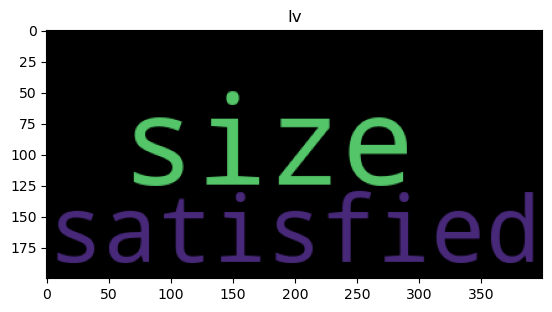

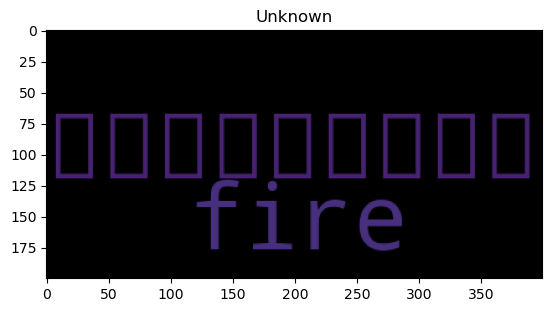

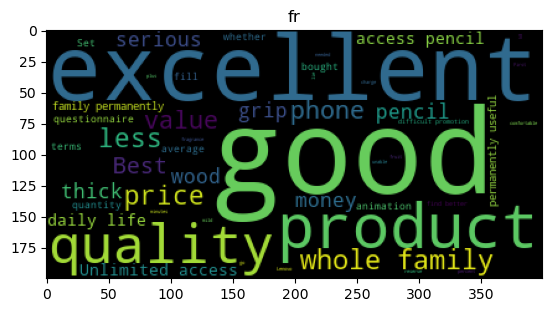

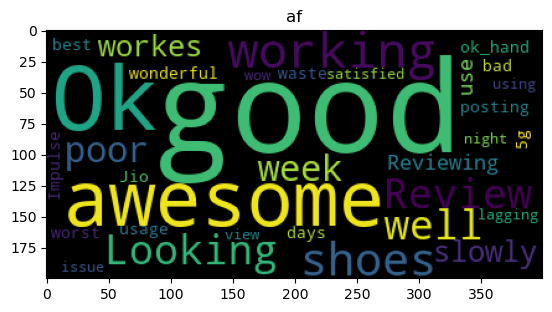

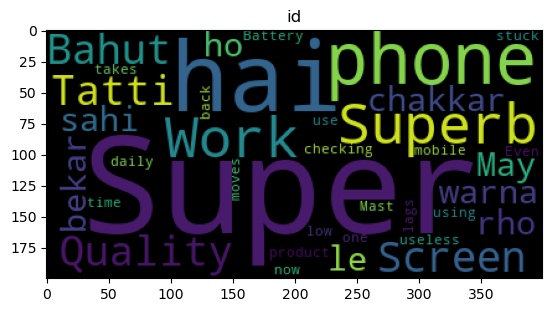

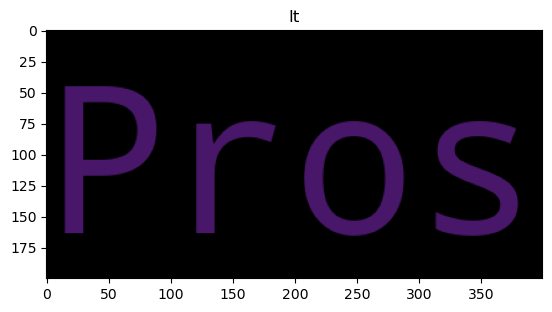

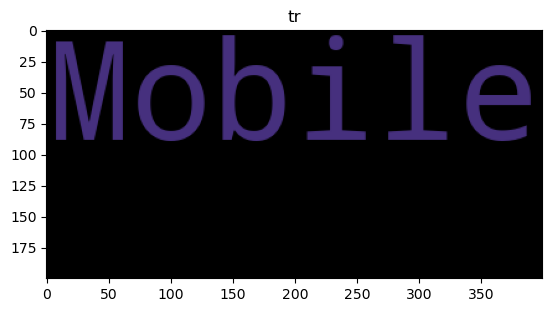

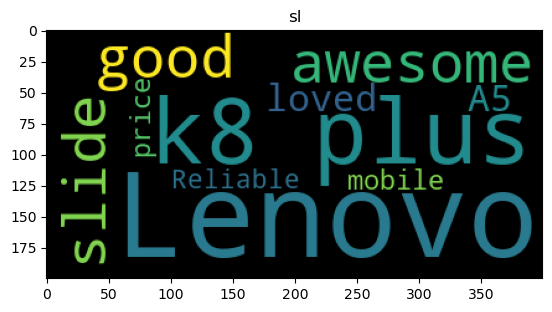

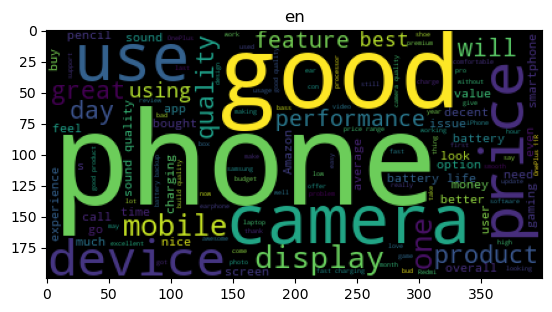

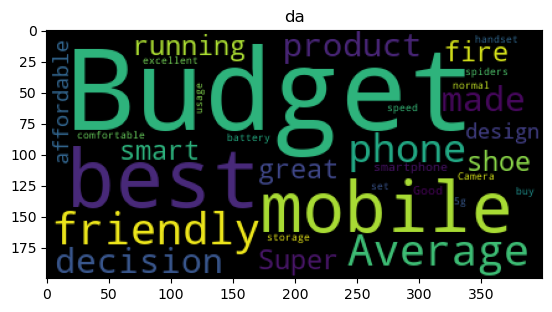

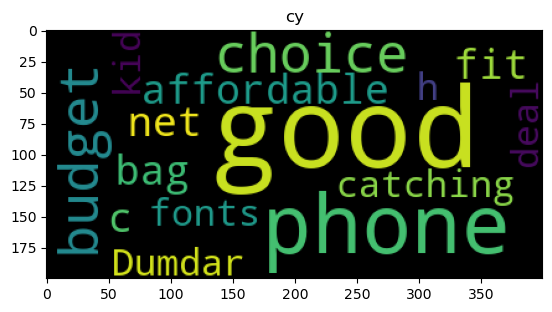

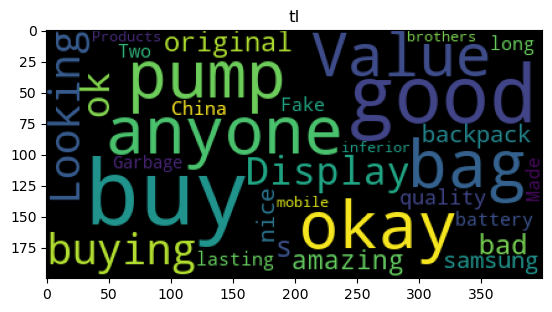

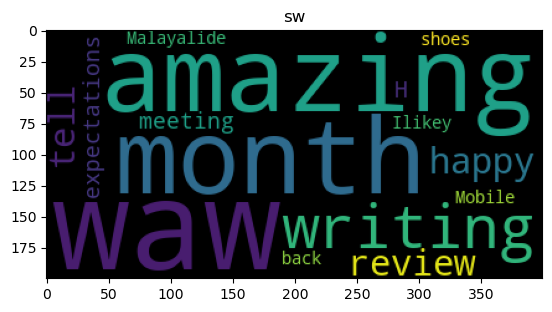

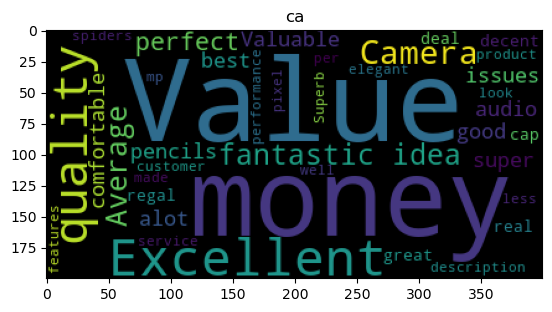

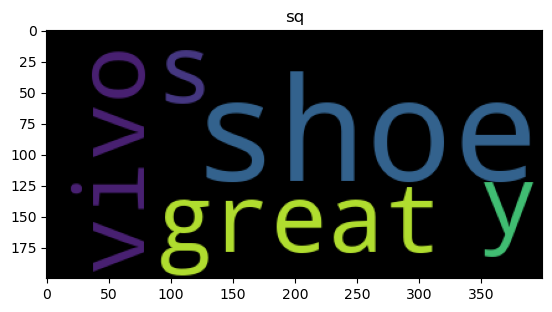

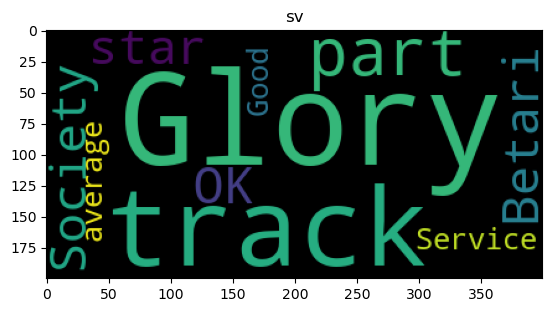

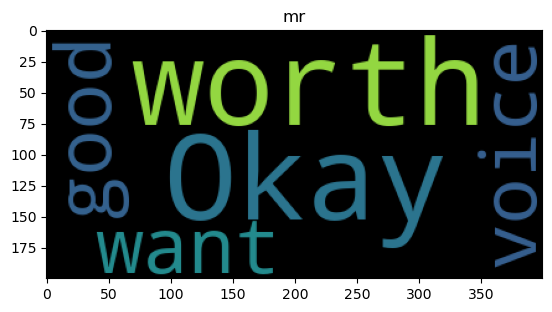

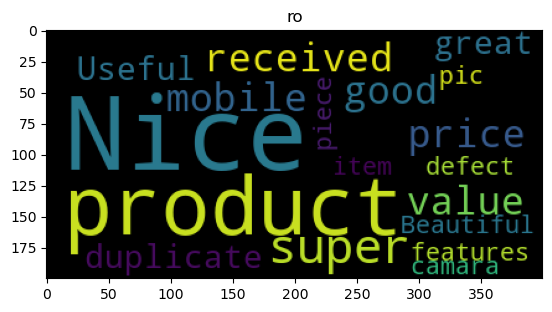

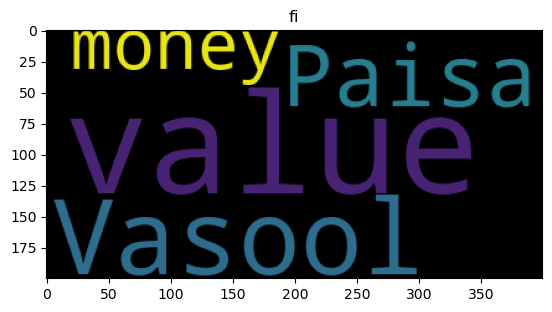

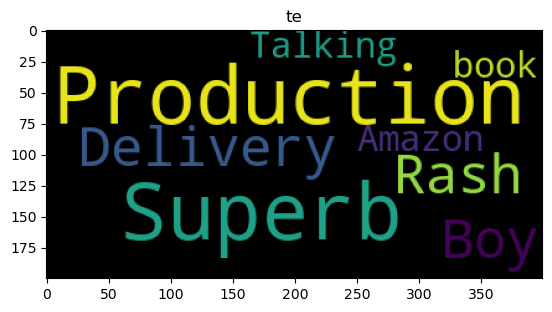

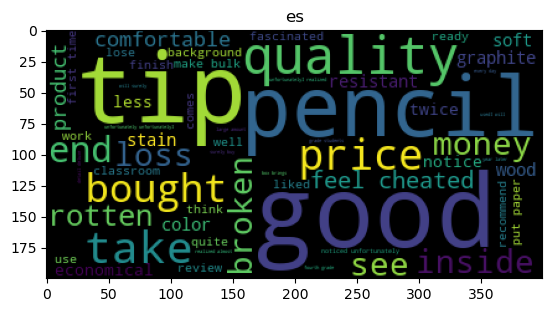

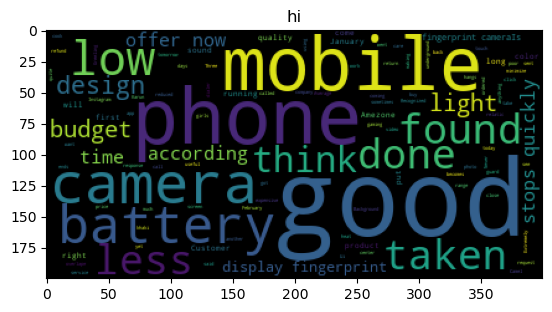

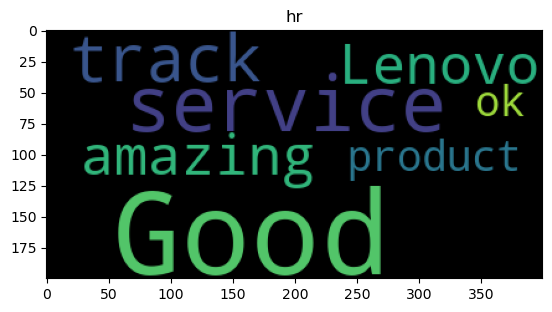

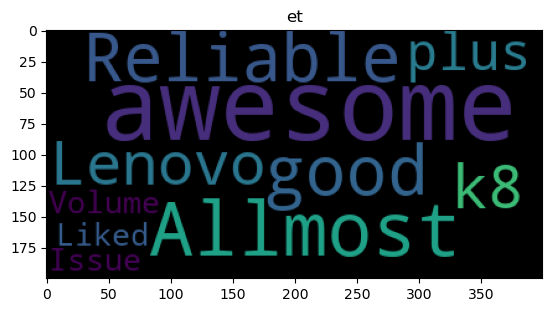

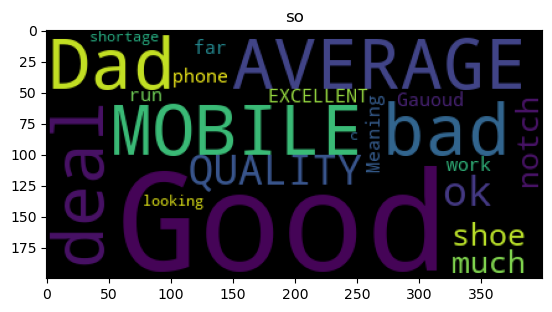

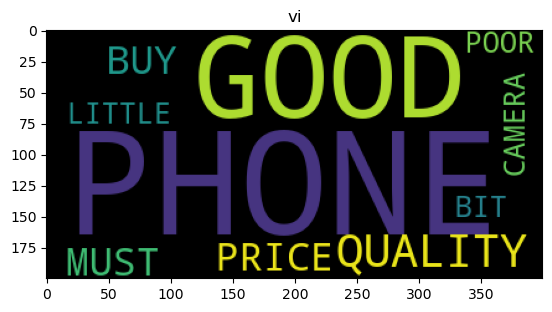

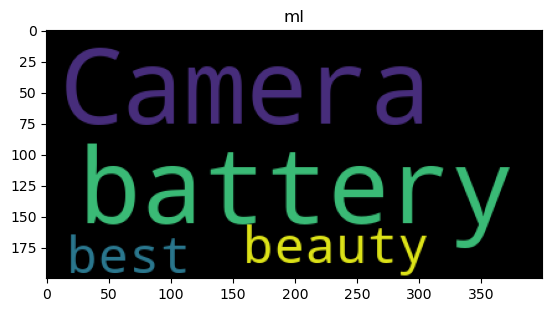

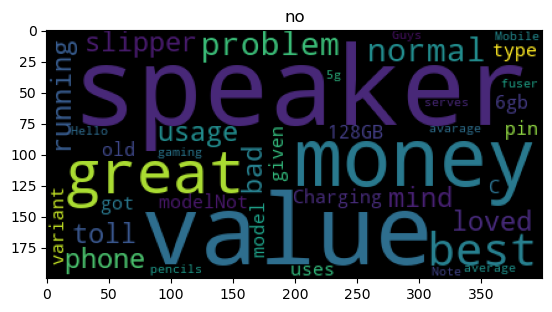

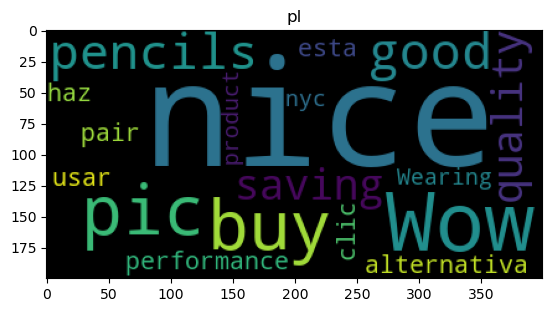

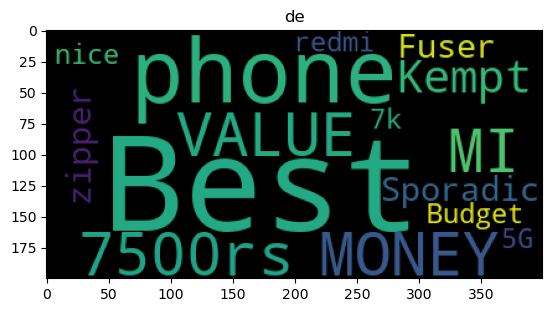

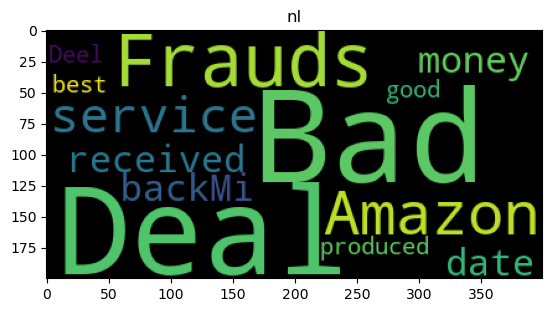

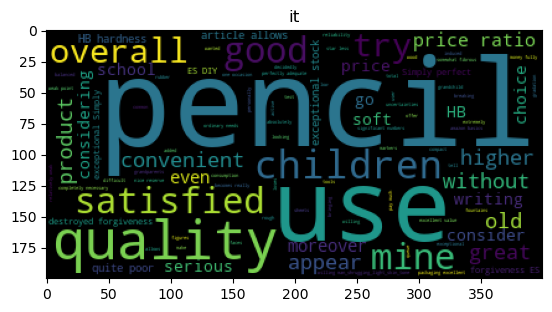

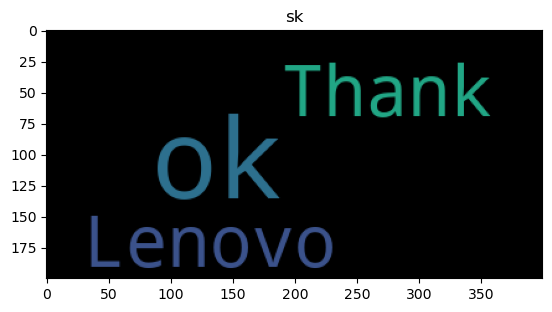

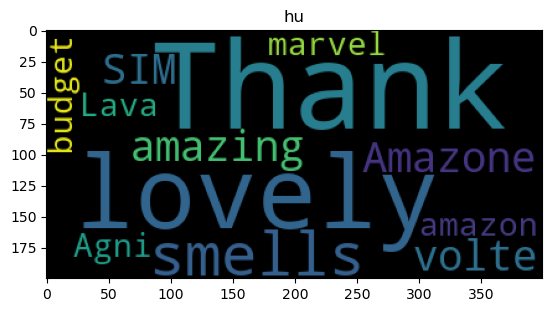

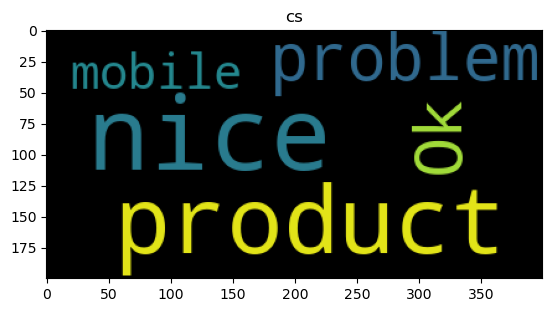

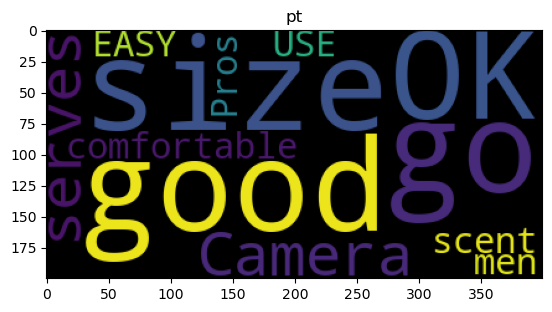

In [17]:
l=list(set(data3["Language"]))
for lan in l:       
    text=" ".join(i for i in data4.get_group(lan)["Translated_Review"].fillna(""))
    wordcloud=WordCloud().generate(text)
    plt.imshow(wordcloud)
    plt.title(lan)
    plt.show()

Now the data is completely clean to perform further steps

In [18]:
#Feature engineering

In [5]:
#Extracting feature vriables and class variables
fv=data3.iloc[:,3]
cv=data3.iloc[:,0]

In [6]:
cv=cv.map({1:"Negative",2:"Negative",3:"Negative",4:"Positive",5:"Positive"})
cv=cv.map({"Positive":0,"Negative":1})

Class variable(Rating) of the data are ranging from 1 to 5 . Differentiating the Review based on the Rating as "Negative" or "Positive"

In [7]:
#Splitting thhe data to train and test sets
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=1,stratify=cv)

In [8]:
#Dividing the data for training and cross validation
x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,test_size=0.2,random_state=1,stratify=y_train)

In [9]:
#Defining different functions to perform text preprocessing 

In [94]:
def lowers(x):
    return x.str.lower()

In [95]:
def html(x):
    return x.apply(lambda x : re.sub("<.+?>"," ",str(x)))

In [96]:
def url(x):
    return x.apply(lambda x:re.sub("http[s]?://.+? +"," ",str(x)))

In [97]:
def unw(x):
    return x.apply(lambda x:re.sub("[]:()*\-.,@#!'?/$%^&0-9]"," ",str(x)))

In [98]:
stp=stopwords.words("english")
stp.remove("not")
stp.remove("no")

In [99]:
def stp1(x):
   l=[]
   for word in word_tokenize(x):

          if word in stp:
             pass
          elif len(word)<=2:
             pass
          else:
            l.append(word)
   return " ".join(l)

In [100]:
def stpp(x):
    return x.apply(lambda x : stp1(x))

In [103]:
#Pipeline to perform Text preprocessing

In [104]:
pre_pro_ppline=Pipeline([("lower",FunctionTransformer(lowers)),("html",FunctionTransformer(html))
                         ,("url",FunctionTransformer(url)),("unw",FunctionTransformer(unw)),
                         ("stp",FunctionTransformer(stpp))])

In [105]:
pre_pro_ppline

Pipeline(steps=[('lower',
                 FunctionTransformer(func=<function lowers at 0x00000293B6E50F70>)),
                ('html',
                 FunctionTransformer(func=<function html at 0x00000293B5F9AB00>)),
                ('url',
                 FunctionTransformer(func=<function url at 0x00000293B67B1C60>)),
                ('unw',
                 FunctionTransformer(func=<function unw at 0x00000293B5F9A950>)),
                ('stp',
                 FunctionTransformer(func=<function stpp at 0x00000293B3726830>)),
                ('trans',
                 FunctionTransformer(func=<function t_to_e at 0x00000293B67B3F40>))])

In [106]:
#Preprocessing the data using pipeline
pp_data=pre_pro_ppline.fit_transform(x_train)
x_cv=pre_pro_ppline.transform(x_cv)
x_test=pre_pro_ppline.transform(x_test)

AttributeError: 'Series' object has no attribute 'lower'

In [ ]:
pp_data

In [23]:
#EDA for training set

In [24]:
from wordcloud import WordCloud
text=" ".join(i for i in pp_data)
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)
plt.show()

TypeError: 'NoneType' object is not iterable

In [38]:
data1=pd.concat([pp_data,y_train],axis=1)

In [39]:
data1

,Translated_Review,Rating
3409,best products,0
2161,best sound ram rom good price,0
3196,study entertainment calling,1
1951,overall good installation done windows update ...,0
3006,build quality good phone camera performance no...,1
...,...,...
1136,box pencils not much say son said pencils firs...,0
2887,super fast delivered amazon airfryer good feat...,0
3331,always better buy sasta wala phone phone getti...,1
93,comfortable,0


In [40]:
grp=data1.groupby("Rating")

In [41]:
from collections import Counter

In [42]:
Counter(" ".join(grp.get_group(0)["Translated_Review"]).split()).most_common(10)

[('good', 1304),
 ('phone', 907),
 ('not', 658),
 ('quality', 599),
 ('battery', 551),
 ('camera', 533),
 ('price', 395),
 ('performance', 305),
 ('product', 296),
 ('like', 295)]

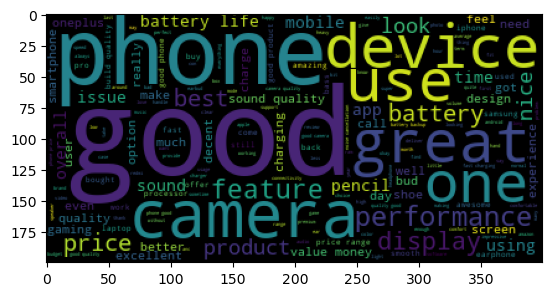

In [43]:
text=" ".join(i for i in grp.get_group(0)["Translated_Review"])
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)
plt.show()

In [44]:
Counter(" ".join(grp.get_group(1)["Translated_Review"]).split()).most_common(10)

[('not', 283),
 ('phone', 249),
 ('good', 217),
 ('camera', 125),
 ('battery', 120),
 ('quality', 115),
 ('mobile', 85),
 ('price', 71),
 ('product', 68),
 ('amazon', 62)]

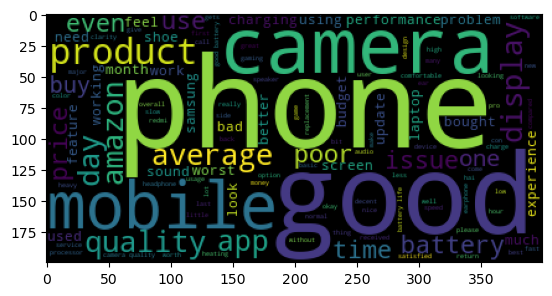

In [45]:
text=" ".join(i for i in grp.get_group(1)["Translated_Review"])
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)
plt.show()

In [46]:
#Using different Naive Bayes Algorithms to find the best algorithm 

In [47]:
#NB using binary bag of words
cv1=CountVectorizer(binary=True)
x_train_cv1=cv1.fit_transform(pp_data)
x_cv1=cv1.transform(x_cv)
x_test_cv1=cv1.transform(x_test)

In [48]:
x_train_cv1

<2399x5478 sparse matrix of type '<class 'numpy.int64'>'
	with 45834 stored elements in Compressed Sparse Row format>

In [49]:
x_cv1

<600x5478 sparse matrix of type '<class 'numpy.int64'>'
	with 10584 stored elements in Compressed Sparse Row format>

In [50]:
x_test_cv1

<750x5478 sparse matrix of type '<class 'numpy.int64'>'
	with 14392 stored elements in Compressed Sparse Row format>

In [51]:
#Fitting the model and predicting class labels to get training error for different alpha values
bb1_error=[]
for k in range(0,100):
    bb1=BernoulliNB(alpha=k)
    model=bb1.fit(x_train_cv1,y_train)
    predicted_y=model.predict(x_train_cv1)
    bb1_error.append(1-accuracy_score(y_train,predicted_y))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


In [52]:
#Fitting the model and predicting class labels to get cross validation error for different alpha values
bb1_cv_error=[]
for k in range(0,100):
    bb1=BernoulliNB(alpha=k)
    model=bb1.fit(x_train_cv1,y_train)
    predicted_y=model.predict(x_cv1)
    bb1_cv_error.append(1-accuracy_score(y_cv,predicted_y))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


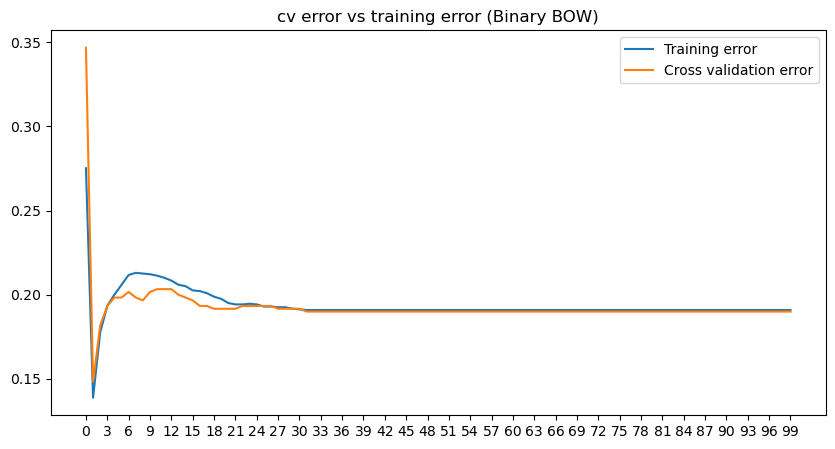

In [53]:
#Plotting Training error and cross validation error
plt.figure(figsize=(10,5))
plt.plot(range(0,100),bb1_error,label="Training error")
plt.plot(range(0,100),bb1_cv_error,label="Cross validation error")
plt.title("cv error vs training error (Binary BOW)")
plt.xticks(range(0,100,3))
plt.legend()
plt.show()

In [54]:
cv2=CountVectorizer()
x_train_cv2=cv2.fit_transform(pp_data)
x_cv2=cv2.transform(x_cv)
x_test_cv2=cv2.transform(x_test)

In [55]:
#Bernouli Naive Bayes (Bag of words)
#Fitting the model and predicting class labels to get training error for different alpha values 
bb2_error=[] 
for k in range(0,100):
    bb2=BernoulliNB(alpha=k)
    model=bb2.fit(x_train_cv2,y_train)
    predicted_y=model.predict(x_train_cv2)
    bb2_error.append(1-accuracy_score(y_train,predicted_y))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


In [56]:
bb2_cv_error=[]
for k in range(0,100):
    bb2=BernoulliNB(alpha=k)
    model=bb2.fit(x_train_cv2,y_train)
    predicted_y=model.predict(x_cv2)
    bb2_cv_error.append(1-accuracy_score(y_cv,predicted_y))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


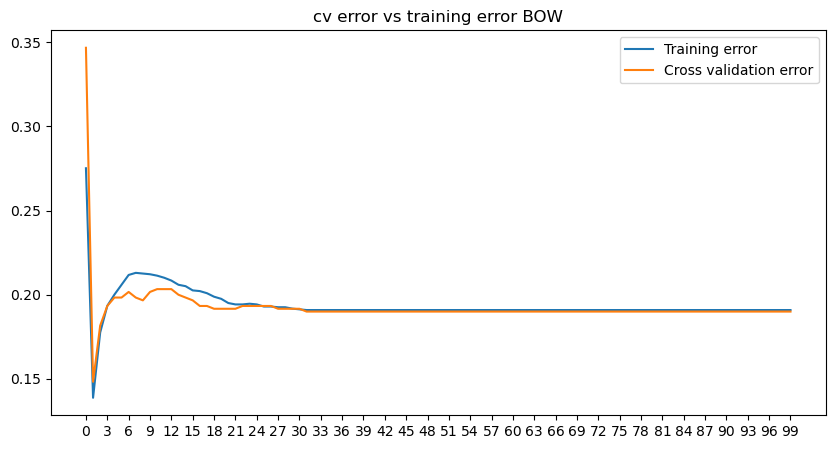

In [57]:
#Plotting Training error and cross validation error
plt.figure(figsize=(10,5))
plt.plot(range(0,100),bb2_error,label="Training error")
plt.plot(range(0,100),bb2_cv_error,label="Cross validation error")
plt.xticks(range(0,100,3))
plt.title("cv error vs training error BOW")
plt.legend()
plt.show()

In [58]:
#Multinomial Naive Bayes
bb3_train_error=[]
for k in range(0,100):
    bb3=MultinomialNB(alpha=k)
    model=bb3.fit(x_train_cv2,y_train)
    predicted_y=model.predict(x_train_cv2)
    bb3_train_error.append(1-accuracy_score(y_train,predicted_y))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


In [59]:
bb3_cv_error=[]
for k in range(0,100):
    bb3=MultinomialNB(alpha=k)
    model=bb3.fit(x_train_cv2,y_train)
    predicted_y=model.predict(x_cv2)
    bb3_cv_error.append(1-accuracy_score(y_cv,predicted_y))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


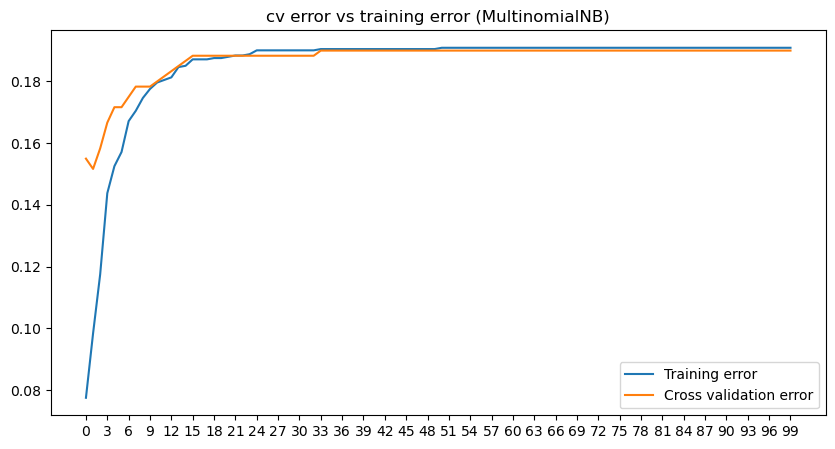

In [60]:
plt.figure(figsize=(10,5))
plt.plot(range(0,100),bb3_train_error,label="Training error")
plt.plot(range(0,100),bb3_cv_error,label="Cross validation error")
plt.xticks(range(0,100,3))
plt.title("cv error vs training error (MultinomialNB)")
plt.legend()
plt.show()

In [61]:
#TFIDF vectorization
tf=TfidfVectorizer(ngram_range=(1,1))
x_train_tf=tf.fit_transform(pp_data,y_train)
x_test_tf=tf.transform(x_test)
x_cv_tf=tf.transform(x_cv)

In [62]:
#importing Gaussian Naive bayes
from sklearn.naive_bayes import GaussianNB

#fitting the model based on training dataset
gb1=GaussianNB()
model=gb1.fit(x_train_tf.toarray(),y_train)

pred_y=model.predict(x_test_tf.toarray())

In [63]:
print("* "*10,"Report for Binary bag of words","* "*10)
bb1=BernoulliNB(alpha=1)
model=bb1.fit(x_train_cv1,y_train)
predicted_y=model.predict(x_test_cv1)
accuracy_score(y_test,predicted_y)
print(classification_report(y_test,predicted_y))

print("* "*10,"Report for Bag of words","* "*10)
bb2=BernoulliNB(alpha=1)
model=bb2.fit(x_train_cv2,y_train)
predicted_y=model.predict(x_test_cv2)
print(classification_report(y_test,predicted_y))

print("* "*10,"Report for Multinomial Naive Bayes","* "*10)
bb3=MultinomialNB(alpha=1)
model=bb3.fit(x_train_cv2,y_train)
predicted_y=model.predict(x_test_cv2)
print(classification_report(y_test,predicted_y))

print("* "*10,"Report for Guassian Naive Bayes","* "*10)
gb1=GaussianNB()
model=gb1.fit(x_train_tf.toarray(),y_train)
pred_y=model.predict(x_test_tf.toarray())
print(classification_report(y_test,predicted_y))

* * * * * * * * * *  Report for Binary bag of words * * * * * * * * * * 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       607
           1       0.71      0.24      0.36       143

    accuracy                           0.84       750
   macro avg       0.78      0.61      0.64       750
weighted avg       0.82      0.84      0.80       750

* * * * * * * * * *  Report for Bag of words * * * * * * * * * * 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       607
           1       0.71      0.24      0.36       143

    accuracy                           0.84       750
   macro avg       0.78      0.61      0.64       750
weighted avg       0.82      0.84      0.80       750

* * * * * * * * * *  Report for Multinomial Naive Bayes * * * * * * * * * * 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       607
           1       0.